# EDA
This notebook contains exploratory data analysis for the data science exercise to predict bank customers' behavior.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline

## Data load

In [151]:
train_data = pd.read_excel('train_file.xlsx', )
print(f'Data shape: {train_data.shape}')

Data shape: (32910, 15)


In [149]:
train_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,0,nonexistent,no


## EDL

### Duplicates

In [150]:
train_data.drop_duplicates(inplace=True, ignore_index=True)
train_data.shape

(32902, 15)

### Data types, missing values

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32902 entries, 0 to 32909
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32902 non-null  int64 
 1   job          32902 non-null  object
 2   marital      32902 non-null  object
 3   education    32902 non-null  object
 4   default      32902 non-null  object
 5   housing      32902 non-null  object
 6   loan         32902 non-null  object
 7   contact      32902 non-null  object
 8   month        32902 non-null  object
 9   day_of_week  32902 non-null  object
 10  duration     32902 non-null  int64 
 11  campaign     32902 non-null  int64 
 12  previous     32902 non-null  int64 
 13  poutcome     32902 non-null  object
 14  y            32902 non-null  object
dtypes: int64(4), object(11)
memory usage: 4.0+ MB


There are no missing values

### Numerical vs. categorical features

In [8]:
print(f'Numerical features: {list(train_data.select_dtypes(exclude="object").columns)}')
print(f'Categorical features: {list(train_data.select_dtypes("object").columns)}')

Numerical features: ['age', 'duration', 'campaign', 'previous']
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


List of categories

In [122]:

for cat_column in train_data.select_dtypes('object'):
    print(f'{cat_column}: {train_data[cat_column].unique()}\n')

job: ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'unknown'
 'housemaid']

marital: ['married' 'divorced' 'single' 'unknown']

education: ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'unknown' 'basic.6y' 'illiterate']

default: ['unknown' 'no' 'yes']

housing: ['no' 'yes' 'unknown']

loan: ['no' 'yes' 'unknown']

contact: ['cellular' 'telephone']

month: ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']

day_of_week: ['wed' 'mon' 'tue' 'fri' 'thu']

poutcome: ['nonexistent' 'failure' 'success']

y: ['no' 'yes']



### Data leakage  
The feature *duration* seems to be available after the marketing call only and not for prediction purposes.  
Therefore, we need to drop it from the training dataset.

In [129]:
train_data.drop('duration', axis=1, inplace=True)
print(f'Data shape: {train_data.shape}')
train_data.head()

Data shape: (32910, 14)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,4,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,2,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,2,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,2,0,nonexistent,no


### Target balance

In [130]:
value_counts = train_data.y.value_counts()
print(value_counts)
value_counts[0]/value_counts[1]

no     29203
yes     3707
Name: y, dtype: int64


7.877798759104397

Note:  
The target is skewed (imbalanced data) which needs to be handled during model training.

### Outliers
Numeric features ['age', 'campaign', 'previous'] are not really subjects of outlier detection in the classic sense of the term.

In [135]:
def identify_outliers(data):
    data_mean, data_std = np.mean(data), np.std(data)

    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    print('Number of outliers samples: %d' % len(outliers))

    outliers_removed = [x for x in data if x >= lower and x <= upper]
    print('Number of non-outliers: %d' % len(outliers_removed))

In [137]:
def plot_num_dist_y(data):
    """Plots numeric values with respect ot target yes/no classes

    Args:
        data (DataFrame): Categories to plot
    """
    
    for column, _ in data.select_dtypes(exclude='object') .iteritems():
        print(f'COLUMN {column}')
        sns.kdeplot(data=data, x=column, hue='y', multiple='stack')
        plt.show()
        sns.boxplot(data=data[column], orient='h')
        plt.show()
        
        identify_outliers(data[column])

COLUMN age


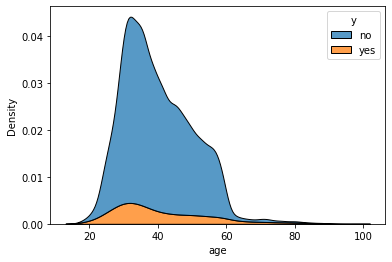

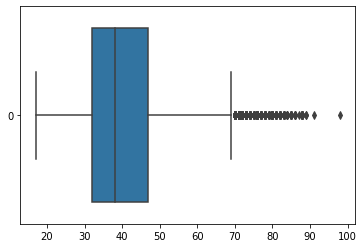

Number of outliers samples: 286
Number of non-outliers: 32624
COLUMN campaign


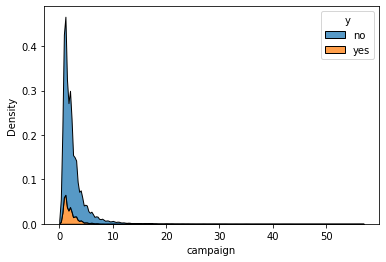

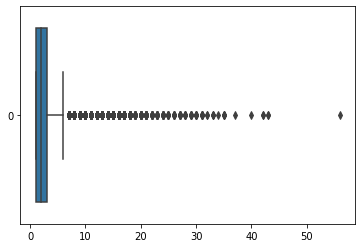

Number of outliers samples: 687
Number of non-outliers: 32223
COLUMN previous


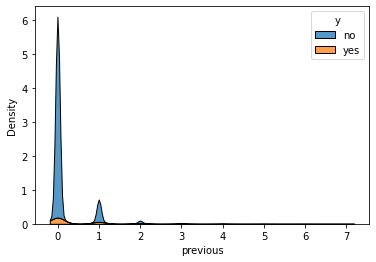

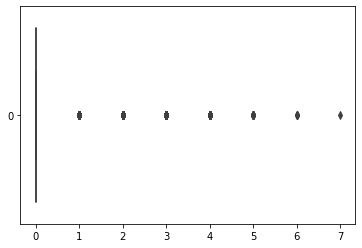

Number of outliers samples: 861
Number of non-outliers: 32049


In [138]:
plot_num_dist_y(train_data)

### Distribution of categories regarding target

In [55]:
def plot_category_dist_y(data):
    """Plots counts of category values with respect ot target yes/no classes

    Args:
        data (DataFrame): Categories to plot
    """
    
    for column, _ in data.select_dtypes(include='object').iteritems():
        if column == 'y':
            continue
        
        categories = data[column].unique()
        y_yes = data[data.y == 'yes'][column].value_counts()
        y_no = data[data.y == 'no'][column].value_counts()
               
        # set missing counts to zero           
        if len(y_no) > len(y_yes):
            print('Warning: yes/no missing on of the categories')
            y_yes['yes'] = 0
        
        plt.bar(categories, y_no)
        plt.bar(categories, y_yes)
        plt.title(f'Category: {column}')
        plt.xticks(rotation=45)
        plt.ylabel('Count')
        plt.legend(['no', 'yes'])
        plt.show()


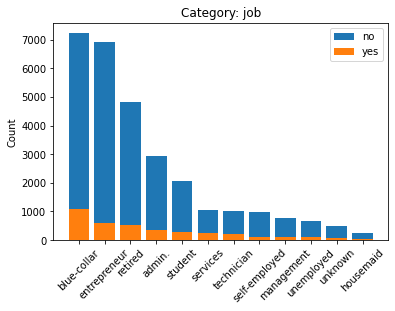

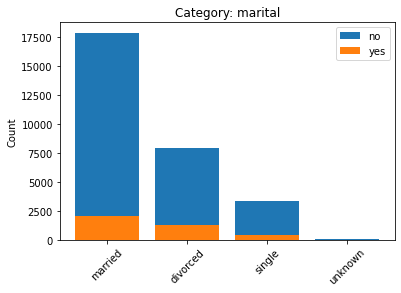

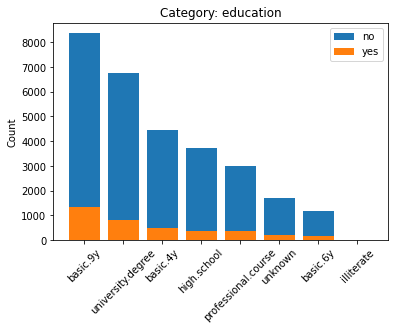

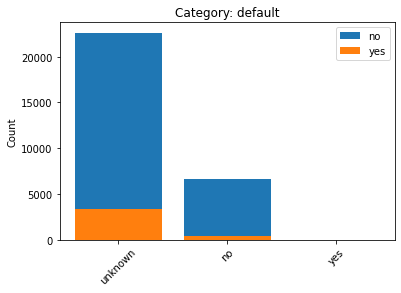

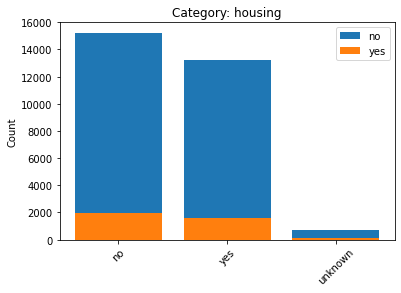

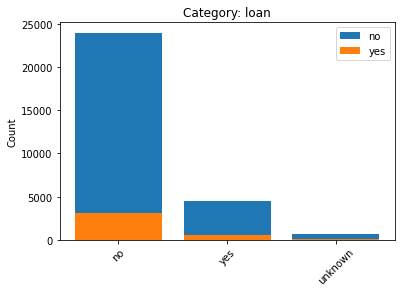

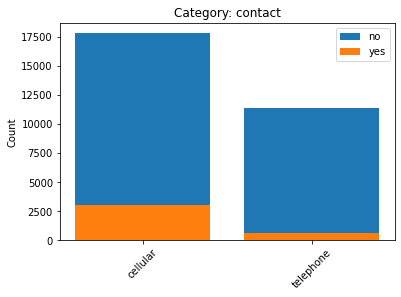

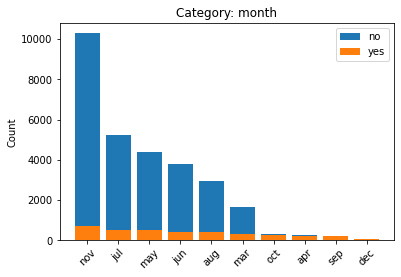

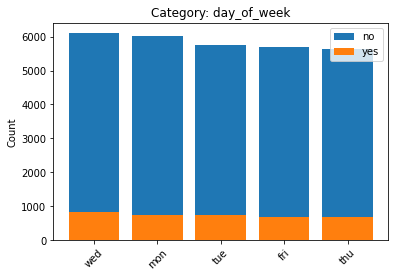

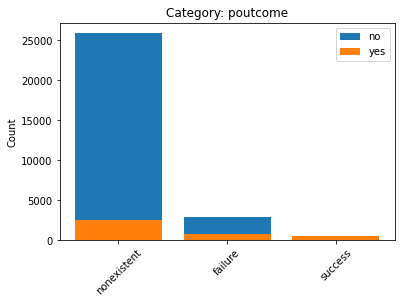

In [54]:
plot_category_dist_y(train_data)

Unknowns in categorical features  
Note: "Missing" data for categorical features is marked 'unknown'

In [11]:
def get_unkowns(data):
    """Returns "unknown" value counts for each category in data

    Args:
        data (DataFrame): The categories to count

    Returns:
        DataFrame: The "unknown" counts
    """
    unknowns = {}
    for cat in data.select_dtypes('object'):
        try:
            unknowns[cat] = [data[cat].value_counts()['unknown']]
        except:
            pass

    return pd.DataFrame.from_dict(unknowns)

In [12]:
def plot_unkown_dist_y(data):
    """Plots the distribution of "unknown" counts

    Args:
        data (DataFrame): The "unknown" counts to plot
    """
    unknowns_df_no = get_unkowns(data[data.y == 'no'])
    unknowns_df_yes = get_unkowns(data[data.y == 'yes'])

    plt.bar(x=unknowns_df_no.columns, height=unknowns_df_no.iloc[0,:])
    plt.bar(x=unknowns_df_yes.columns, height=unknowns_df_yes.iloc[0,:])
    plt.title('Number of unknown categorical values (% yes)')
    plt.xlabel('Feature')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.ylim(0,7500)
    plt.legend(['no', 'yes'])
    for index in range(0, unknowns_df_no.shape[1]):
        value = unknowns_df_yes.iloc[0, index] / unknowns_df_no.iloc[0, index] * 100
        hight = unknowns_df_no.iloc[0, index]
        plt.text(index-0.3, hight+100, f'{value:.2f}%')
    plt.show()

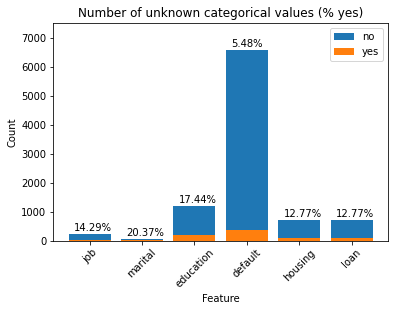

In [13]:
plot_unkown_dist_y(train_data)

Note: Keep "unknowns" because
- It can be seen as an additional category
- There is too little data for the positive class
- Could be missed during test predictions

### Distributions of the positive and negative examples

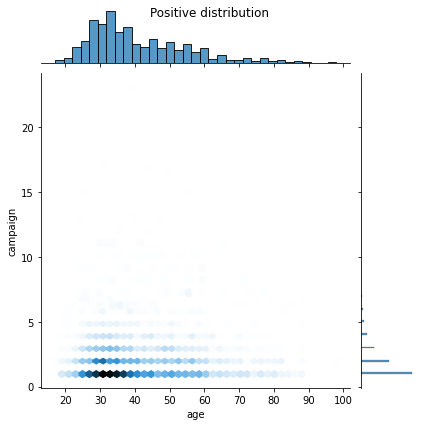

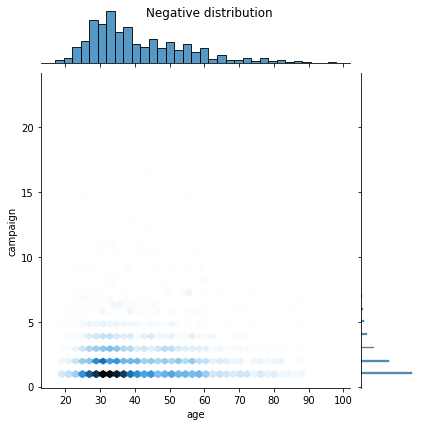

In [14]:
bool_train_labels = np.array(train_data.y) != 'no'
train_num_features = np.array(train_data.select_dtypes(exclude='object'))
columns = train_data.select_dtypes(exclude='object').columns

pos_df = pd.DataFrame(train_num_features[bool_train_labels], columns=columns)
neg_df = pd.DataFrame(train_num_features[bool_train_labels], columns=columns)

sns.jointplot(x=pos_df['age'], y=pos_df['campaign'], kind='hex')
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['age'], y=neg_df['campaign'], kind='hex')
_ = plt.suptitle("Negative distribution")

### Pandas profiler

In [152]:
profile = ProfileReport(train_data, title="Pandas Profiling Report",
                        explorative=True,
                        vars={"num": {"low_categorical_threshold": 0}},
                        correlations={"pearson": {"calculate": True, "threshold": 0.7},
                                      "spearman": {"calculate": False},
                                      "kendall": {"calculate": False},
                                      "phi_k": {"calculate": False},
                                      "cramers": {"calculate": True, "threshold": 0.7}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Summary

- There are few duplicates
- To avoid data leakage drop the feature *duration*
- Categorical features have missing values marked as "unknown" (no drop)
- The data is imbalanced with respect to target "y" (no/yes ratio ~8)
- Some multicollinearity was found between housing and loan